In [1]:
## Create a tmp file containing only the lines containing "Bilayer Surface Tension" and the corresponding values

import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import cycle
# Change the default pyplot parameters to put a readable size of text
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [2]:

labels = []
files = glob.glob('stabilizeLipid4/*/dmpcas.*')
tmp_files = []
for i in range(len(files)):
    labels.append(str(files[i].strip().split('/')[0:3]).strip().split('_')[-3])
    tmp_files.append(str(str(('/').join(files[i].split('/')[0:2])) + '/' + str(files[i].split('.')[-1]) + '.tmp'))
    if os.path.exists(tmp_files[i]):
        os.system(f'rm { tmp_files[i] }')
    os.system('grep -A 1 "Bilayer Surface Tension" {} > {}'.format(files[i], tmp_files[i]))

labelValue = {}
for i in range(len(files)):
    with open(tmp_files[i], 'rt') as rf:
        localLines = []
        for line in rf:
            line = (line.strip().split())[0]
            localLines.append(line)
        goodLines = []
        for ind in range(1,54,3):
            goodLines.append(float(localLines[ind]))
        labelValue[labels[i]] = goodLines

In [3]:
BST_df = pd.DataFrame.from_dict(labelValue, orient='columns').drop([0,1,2,3,4])
BST_df

,"1.7000000', 'dmpcas.lp6","0.6500000', 'dmpcas.lp6","1.7750000', 'dmpcas.lp6","1.4750000', 'dmpcas.lp6","1.2500000', 'dmpcas.lp6","1.9250000', 'dmpcas.lp6","0.5750000', 'dmpcas.lp6","0.9500000', 'dmpcas.lp6","1.3250000', 'dmpcas.lp6","1.6250000', 'dmpcas.lp6",...,"1.0250000', 'dmpcas.lp6","2.0000000', 'dmpcas.lp6","1.4000000', 'dmpcas.lp6","0.7250000', 'dmpcas.lp6","1.1750000', 'dmpcas.lp6","0.8000000', 'dmpcas.lp6","1.5500000', 'dmpcas.lp6","0.5000000', 'dmpcas.lp6","1.8500000', 'dmpcas.lp6","1.1000000', 'dmpcas.lp6"
5,2.863563,4.931228,2.905558,3.076646,2.573077,2.622916,5.999818,2.256616,3.128596,3.603942,...,1.854114,2.891030,2.915546,4.000612,2.635969,3.427225,2.689677,2.697891,3.287903,2.266136
6,3.534638,5.252224,3.756719,2.862717,2.738487,3.319872,6.266621,1.804463,3.060639,3.116956,...,1.955748,2.970332,3.353598,3.894374,2.725580,3.410581,3.181786,2.606868,2.962852,2.189423
7,3.599648,5.233930,4.068873,3.231528,3.197085,3.537844,6.182623,2.148548,3.682272,3.925626,...,1.515337,3.220856,3.334786,4.033851,2.627621,3.601088,2.834178,1.753092,3.352804,2.556257
8,3.784375,4.966827,3.128418,3.611219,2.919442,3.438889,5.912311,1.785376,3.735975,3.669535,...,2.150895,3.096730,2.993378,3.665722,2.385204,3.520125,3.044555,1.193423,2.884587,2.630355
9,3.544917,5.251561,3.373038,3.525398,2.632576,2.931971,6.053005,1.884598,3.723988,3.272458,...,1.430737,2.936273,3.427834,3.998317,2.697595,3.624201,3.035155,0.697601,2.759017,2.192776
10,3.674064,5.198663,3.450726,3.713899,3.691925,2.796155,6.067160,2.258059,3.622513,4.051006,...,1.584095,3.245003,3.399832,3.966196,2.336302,3.251713,3.476718,1.097417,2.917441,2.017947
11,3.666413,4.760080,3.232615,3.494276,3.362990,2.676367,5.863176,2.078752,3.410458,3.931871,...,1.347384,3.002565,3.310855,3.995831,2.282494,3.737953,3.139086,0.517320,3.169277,2.422026
12,3.564637,4.818258,3.238837,3.778652,3.333583,2.959711,6.063940,2.106561,3.211421,3.612765,...,1.109372,3.094001,3.144630,4.101920,2.267459,3.197862,3.157251,0.631799,2.640135,2.648463
13,3.086953,4.894590,3.668971,4.088567,2.957425,2.233968,6.278275,1.840048,3.438639,3.905590,...,1.728663,2.552346,3.213425,4.391616,2.658189,3.326711,3.127054,0.618191,2.954131,2.016022
14,3.641262,4.921244,3.848351,3.891170,3.194215,2.695707,5.977183,1.941593,3.954107,3.562391,...,1.804367,2.269618,3.212279,4.228450,2.303529,3.646141,3.253564,0.842517,2.855009,1.949748


In [5]:
BST_df.mean()

AttributeError: 'Series' object has no attribute 'sort'

In [19]:
is_close_to_0 = (BST_df.mean()<0.5) & (BST_df.mean()>-0.5) 

display(BST_df.iloc[:,is_close_to_0.values])
display(BST_df.iloc[:,is_close_to_0.values].mean())

""
1
2
3
4
5
6
7
8
9
10


Series([], dtype: float64)

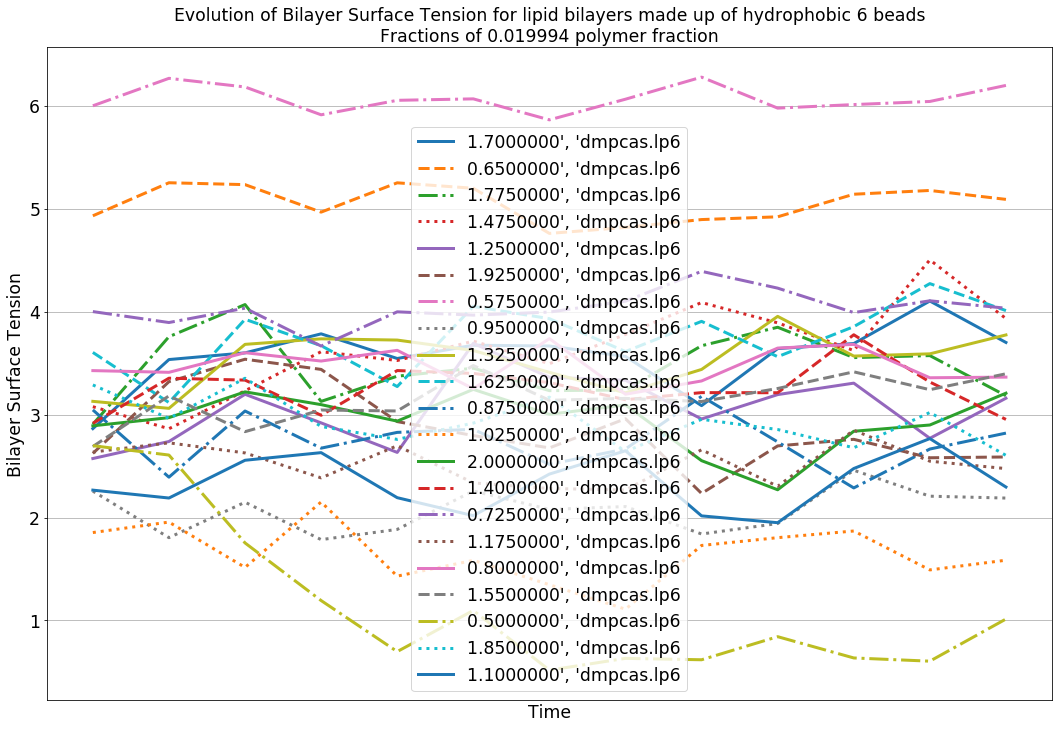

In [6]:
maxLines = len(localLines)
x_axis = list(range(1, maxLines))

# Changes the line type for each lines
lines = ["-","--","-.",":"]
linecycler = cycle(lines)

plt.figure(figsize=(18,12))
for label in labels:
    plt.plot(labelValue[label][5:], next(linecycler), linewidth=3)
plt.legend(labels)
plt.grid()
plt.xlabel('Time')
plt.xticks([])
plt.ylabel('Bilayer Surface Tension')
plt.title('Evolution of Bilayer Surface Tension for lipid bilayers made up of hydrophobic 6 beads\nFractions of 0.019994 polymer fraction')
plt.show()

In [8]:
labelMean = pd.DataFrame.from_dict(labelValue, orient='columns')
labelMean = (labelMean.drop([0,1,2,3,4])).mean()
display(labelMean.sort_values())

0.5000000', 'dmpcas.lp6    1.146954
1.0250000', 'dmpcas.lp6    1.648175
0.9500000', 'dmpcas.lp6    2.073872
1.1000000', 'dmpcas.lp6    2.340652
1.1750000', 'dmpcas.lp6    2.522358
0.8750000', 'dmpcas.lp6    2.745971
1.9250000', 'dmpcas.lp6    2.857069
1.8500000', 'dmpcas.lp6    2.929616
2.0000000', 'dmpcas.lp6    2.940279
1.2500000', 'dmpcas.lp6    3.064226
1.5500000', 'dmpcas.lp6    3.153289
1.4000000', 'dmpcas.lp6    3.257764
1.7750000', 'dmpcas.lp6    3.460166
0.8000000', 'dmpcas.lp6    3.472885
1.3250000', 'dmpcas.lp6    3.530845
1.7000000', 'dmpcas.lp6    3.573420
1.4750000', 'dmpcas.lp6    3.640932
1.6250000', 'dmpcas.lp6    3.753003
0.7250000', 'dmpcas.lp6    4.031302
0.6500000', 'dmpcas.lp6    5.049029
0.5750000', 'dmpcas.lp6    6.070440
dtype: float64

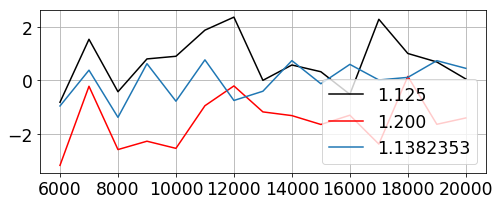

AttributeError: 'list' object has no attribute 'mean'

In [8]:
plt.figure(figsize=(8,3))
plt.plot(x_axis[5:],labelValue['1.125'][5:], 'k', x_axis[5:], labelValue['1.200'][5:], 'r', x_axis[5:],labelValue['1.1382353'][5:])
plt.grid()
plt.legend(['1.125','1.200','1.1382353'])
plt.show()

display('Mean 1.125: {:5f}'.format(labelValue['1.125'][5:].mean()))
display('Mean 1.200: {:.5f}'.format(labelValue['1.200'][5:].mean()))
display('Mean 1.1382353: {:.5f}'.format(labelValue['1.1382353'][5:].mean()))


Thus, we'll now want to iterate between 1.125 and 1.200, until the value of label Mean reach roughly 0.1, as recommended by the teacher.

After more tests, we can see that 1.1382353 gives us a mean Bilayer Surface Tension of 0.00588, which is good enough for us!